

# Clustering with Python



Import of the basic packages to use

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas.tools
import matplotlib.pyplot as plt
import random
import sklearn
from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv("F:\\Study\\DM\\credit_default_train.csv", skipinitialspace=True, 
                 sep=',')
df_work=df.copy()
df_work=df_work[['ba-sep', 'ba-aug', 'ba-jul', 'ba-jun', 'ba-may', 'ba-apr', 'pa-sep', 'pa-aug', 'pa-jul', 'pa-jun',
       'pa-may', 'pa-apr','limit','age']]
df_work.head()

,ba-sep,ba-aug,ba-jul,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,limit,age
0,48966,49985,50760,49535,30358,30302,2130,1905,1811,1100,1100,1200,50000,25
1,10755,9981,7843,6335,4616,7956,10120,7852,6336,4622,7956,5499,200000,54
2,30057,29280,30206,30496,29731,29047,0,1700,1100,3,1053,1303,30000,-1
3,56426,41717,42823,25224,26855,23783,2000,2000,900,2000,10000,5000,140000,-1
4,47987,48716,47632,48738,49601,52773,1788,0,1894,1801,3997,0,60000,36


In [4]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
ba-sep    10000 non-null int64
ba-aug    10000 non-null int64
ba-jul    10000 non-null int64
ba-jun    10000 non-null int64
ba-may    10000 non-null int64
ba-apr    10000 non-null int64
pa-sep    10000 non-null int64
pa-aug    10000 non-null int64
pa-jul    10000 non-null int64
pa-jun    10000 non-null int64
pa-may    10000 non-null int64
pa-apr    10000 non-null int64
limit     10000 non-null int64
age       10000 non-null int64
dtypes: int64(14)
memory usage: 1.1 MB


## Data Understanding

We observe the distributions of the attributes without considering the class.

In [5]:
from pandas.tools.plotting import scatter_matrix

In [6]:
#df_a=df_work.loc[df.age>0,'age'] 
#mean_age=int(np.mean(df_a)) 
#df_work.loc[df_work.age<1,'age']=mean_age

In [7]:
minA=21
maxA=75
K=5
a=int((maxA-minA)/K)

count1=0
count2=0
count3=0
count4=0
count5=0

min1=20
min2=31
min3=42
min4=53
min5=64

max1=32
max2=43
max3=54
max4=65
max5=76

for i in range(df_work['age'].size): 
    if df_work.iloc[i]['age']>20 and df_work.iloc[i]['age']<32:
        count1+=1
    if df_work.iloc[i]['age']>31 and df_work.iloc[i]['age']<43:
        count2+=1
    if df_work.iloc[i]['age']>42 and df_work.iloc[i]['age']<54:
        count3+=1
    if df_work.iloc[i]['age']>53 and df_work.iloc[i]['age']<65:
        count4+=1
    if df_work.iloc[i]['age']>64 and df_work.iloc[i]['age']<76:
        count5+=1

#print(count1 + ' ' + count2 + ' ' + count3 + ' ' + count4 + ' '+ count5)
sumA=count1+count2+count3+count4+count5

for i in range(df_work['age'].size): 
    if df_work.iloc[i]['age']<0:
        df_work.loc[i,'age']=random.choices(['gr1', 'gr2', 'gr3', 'gr4', 'gr5'], weights=[41, 37, 18, 2, 1])
        
for i in range(df_work['age'].size):
    if df_work.iloc[i]['age']=='gr1':
        df_work.loc[i,'age']=random.randint(min1,max1)
    if df_work.iloc[i]['age']=='gr2':
        df_work.loc[i,'age']=random.randint(min2,max2)
    if df_work.iloc[i]['age']=='gr3':
        df_work.loc[i,'age']=random.randint(min3,max3)
    if df_work.iloc[i]['age']=='gr4':
        df_work.loc[i,'age']=random.randint(min4,max4)
    if df_work.iloc[i]['age']=='gr5':
        df_work.loc[i,'age']=random.randint(min5,max5)

#check the age column
df_work['age'].head()

0    25
1    54
2    48
3    20
4    36
Name: age, dtype: int64

In [8]:
#le = LabelEncoder()
#num_classes = le.fit_transform(df['age'])
#print(num_classes) 

In [9]:
#scatter_matrix(df_work[['age']], figsize=(5, 5), c=num_classes, s=50)
#plt.rcParams.update({'font.size': 10} )
#plt.xticks(fontsize=15, rotation=0)
#plt.yticks(fontsize=15, rotation=0)
#plt.show()

Точки не дают точного представления о кластерах

In [10]:
#scatter_matrix(df_work, figsize=(10, 10))
#plt.show()

In [11]:
#plt.scatter(df_work['pa-sep'], df_work['ba-sep'], s=20)
#plt.tick_params(axis='both', which='major', labelsize=22)
#plt.show()

## Clustering Objective
Grouping a set of instances such that the instances in the same cluster are more ***similar*** (in some sense) to each other than to those in other clusters.  
The result of a clustering algorithm is a ***clustering***, that is a set of clusters.
Clustering is an ***unsupervised*** task, i.e., the real cluster partitioning is unknown.  

## Different Types of Clusterings and Clusters

Principal Types of Clustering:
* **Partitional Clustering:** division into non-overlapping clusters, i.e., each instance is only in one cluster
* Hierarchical Clustering: set of nested clusters organized as a hierarchical tree

Principal Types of Clusters:
* **Center-based:** the calculus is based on a centroid (K-Means)
* **Density-based:** the calculus is based on a concept of neighborhood and density (DBSCAN)

Center-based: <img align="center" src="kmeans.png">
Density-based: <img align="center" src="dbscan.png">

## Clustering Preprocessing - Normalization  
A good practice in clustering to avoid the bias given by the range of the different attribute is normalization.  
The most common adopted normalizations are: Z-Score and Min-Max

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
scaler = StandardScaler()
scaler.fit(df_work.values)

F:\Programs\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
df_work.values

array([[ 48966,  49985,  50760, ...,   1200,  50000,     25],
       [ 10755,   9981,   7843, ...,   5499, 200000,     54],
       [ 30057,  29280,  30206, ...,   1303,  30000,     48],
       ...,
       [ 28477,  28718,  28847, ...,   2000,  90000,     47],
       [  2946,      0,   1473, ...,      0,  20000,     59],
       [259637, 259593, 261595, ...,   8004, 280000,     35]], dtype=int64)

In [15]:
#X=scaler.transform(df_work.values)


In [16]:
#scaler.inverse_transform(scaler.transform(df_work.values)) - обратно

In [17]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_work.values)

F:\Programs\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
X[:5]

array([[1.00839480e-01, 1.77236133e-01, 1.70378543e-01, 1.15166914e-01,
        1.67103281e-01, 3.07774702e-01, 4.31735170e-03, 1.55246349e-03,
        4.33681044e-03, 3.75475318e-03, 2.63164191e-03, 2.26986415e-03,
        5.19480519e-02, 9.09090909e-02],
       [4.00177637e-02, 1.18034097e-01, 1.05246304e-01, 4.77868294e-02,
        1.28590472e-01, 2.79040851e-01, 2.05124879e-02, 6.39892037e-03,
        1.51728498e-02, 1.57767902e-02, 1.90339482e-02, 1.04016525e-02,
        2.46753247e-01, 6.18181818e-01],
       [7.07413975e-02, 1.46594743e-01, 1.39185122e-01, 8.54713253e-02,
        1.66165221e-01, 3.06160946e-01, 0.00000000e+00, 1.38540049e-03,
        2.63417531e-03, 1.02402359e-05, 2.51919902e-03, 2.46469415e-03,
        2.59740260e-02, 5.09090909e-01],
       [1.12713810e-01, 1.65000296e-01, 1.58333093e-01, 7.72484594e-02,
        1.61862415e-01, 2.99392173e-01, 4.05385136e-03, 1.62988293e-03,
        2.15523435e-03, 6.82682396e-03, 2.39240173e-02, 9.45776729e-03,
        1.688

# K-Means

## The Algorithm in a Nutshell

**Objective:** Clusters the data into $k$ groups.
* **Init step:** Select k points at random as cluster centers.
* **Assignment step:** Assign each instance to the cluster with the closest mean according to the distance function.
* **Update step**: Calculate the new means to be the centroids of the instances in the new clusters.
* ***Repeat*** steps 2 and 3 until the assignment no longer change.

There is no guarantee that the optimum is found using this algorithm.

> Tan, P. N. (2006). Introduction to data mining. Pearson Education India.

Running [example](http://matlaspisa.isti.cnr.it:5055/K-Means)
Wikipedia [link](https://en.wikipedia.org/wiki/K-means_clustering)

## K-Means Problems

* Initial Centroids
* Number of clusters

## K-Means in Python  ([sklearn](http://scikit-learn.org/stable/modules/clustering.html#k-means))

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Parameters:
* **n_clusters** (default 8): The number of clusters
* **n_init** (default 10): Number of time k-means will be run with different initial centroids. The final results will be the best output in terms of inertia.
* **max_iter** (default 300): Maximum number of iterations of the k-means algorithm for a single run.

In [20]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=800)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=800,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Output:
* **labels_**: Labels of each point
* **cluster\_centers_**: Coordinates of cluster centers
* **inertia_**: Sum of squared distances of samples to their closest cluster center.

Labels

In [21]:
kmeans.labels_[:15]

array([4, 0, 0, 4, 4, 3, 4, 4, 4, 1, 1, 3, 4, 4, 4])

Observing the size of each cluster

In [22]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]), array([2322, 1342,  303, 2005, 4028], dtype=int64))

In [23]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 2322, 1: 1342, 2: 303, 3: 2005, 4: 4028}

In [24]:
df_work['labelsKMEANS']=kmeans.labels_

Visualization of the clustering in two dimensions.

In [25]:
df_work.head()

,ba-sep,ba-aug,ba-jul,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,limit,age,labelsKMEANS
0,48966,49985,50760,49535,30358,30302,2130,1905,1811,1100,1100,1200,50000,25,4
1,10755,9981,7843,6335,4616,7956,10120,7852,6336,4622,7956,5499,200000,54,0
2,30057,29280,30206,30496,29731,29047,0,1700,1100,3,1053,1303,30000,48,0
3,56426,41717,42823,25224,26855,23783,2000,2000,900,2000,10000,5000,140000,20,4
4,47987,48716,47632,48738,49601,52773,1788,0,1894,1801,3997,0,60000,36,4


Centers

In [26]:
kmeans.cluster_centers_

array([[0.07075846, 0.14480555, 0.13254865, 0.07357012, 0.15321135,
        0.29476345, 0.00692134, 0.00266979, 0.00697553, 0.00998773,
        0.00617528, 0.0051056 , 0.11708447, 0.48273432],
       [0.25996922, 0.31541916, 0.30199491, 0.23512596, 0.29656298,
        0.41355152, 0.02206309, 0.00938605, 0.02201038, 0.02835492,
        0.02139317, 0.01774937, 0.27505778, 0.28059297],
       [0.52708802, 0.56230414, 0.56091324, 0.48125023, 0.51490808,
        0.58525419, 0.04130835, 0.02308965, 0.03741669, 0.04983541,
        0.03891435, 0.0399394 , 0.48832026, 0.34125413],
       [0.05047129, 0.12661694, 0.11626036, 0.06224923, 0.14486084,
        0.28848024, 0.01408793, 0.00605226, 0.01793156, 0.02447744,
        0.01609617, 0.01694637, 0.4181883 , 0.29711177],
       [0.06810006, 0.1433415 , 0.13152746, 0.0738225 , 0.15334205,
        0.29529426, 0.00697386, 0.00266856, 0.00741164, 0.00885414,
        0.00649099, 0.00543536, 0.10276091, 0.15364472]])

In [27]:
print(scaler.inverse_transform(kmeans.cluster_centers_))

[[3.00677196e+04 2.80710039e+04 2.58330879e+04 2.28656710e+04
  2.10726206e+04 2.01832924e+04 3.41470026e+03 3.27605125e+03
  2.91289879e+03 2.92602498e+03 2.58120327e+03 2.69915762e+03
  1.00155039e+05 4.65503876e+01]
 [1.48938625e+05 1.43358037e+05 1.37484789e+05 1.26445426e+05
  1.16888995e+05 1.12563466e+05 1.08850000e+04 1.15174542e+04
  9.19126880e+03 8.30691437e+03 8.94213179e+03 9.38348846e+03
  2.21794490e+05 3.54326136e+01]
 [3.16754937e+05 3.10183155e+05 3.08091515e+05 2.84245294e+05
  2.62831073e+05 2.46094743e+05 2.03798053e+04 2.83328878e+04
  1.56247591e+04 1.45998812e+04 1.62658086e+04 2.11146040e+04
  3.86006601e+05 3.87689769e+01]
 [1.73223880e+04 1.57805955e+04 1.51003905e+04 1.56074100e+04
  1.54911287e+04 1.52969077e+04 6.95039401e+03 7.42662145e+03
  7.48800249e+03 7.17096010e+03 6.72803990e+03 8.95897007e+03
  3.32004988e+05 3.63411471e+01]
 [2.83975883e+04 2.70817182e+04 2.51602074e+04 2.30274813e+04
  2.11599774e+04 2.05960963e+04 3.44061063e+03 3.27454482e+03


In [28]:
kmeans.cluster_centers_

array([[0.07075846, 0.14480555, 0.13254865, 0.07357012, 0.15321135,
        0.29476345, 0.00692134, 0.00266979, 0.00697553, 0.00998773,
        0.00617528, 0.0051056 , 0.11708447, 0.48273432],
       [0.25996922, 0.31541916, 0.30199491, 0.23512596, 0.29656298,
        0.41355152, 0.02206309, 0.00938605, 0.02201038, 0.02835492,
        0.02139317, 0.01774937, 0.27505778, 0.28059297],
       [0.52708802, 0.56230414, 0.56091324, 0.48125023, 0.51490808,
        0.58525419, 0.04130835, 0.02308965, 0.03741669, 0.04983541,
        0.03891435, 0.0399394 , 0.48832026, 0.34125413],
       [0.05047129, 0.12661694, 0.11626036, 0.06224923, 0.14486084,
        0.28848024, 0.01408793, 0.00605226, 0.01793156, 0.02447744,
        0.01609617, 0.01694637, 0.4181883 , 0.29711177],
       [0.06810006, 0.1433415 , 0.13152746, 0.0738225 , 0.15334205,
        0.29529426, 0.00697386, 0.00266856, 0.00741164, 0.00885414,
        0.00649099, 0.00543536, 0.10276091, 0.15364472]])

In [29]:
X=X.transpose()

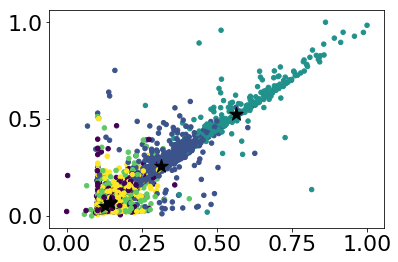

In [30]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(X[1], X[0], c=kmeans.labels_, s=20)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Visualization of clusters centers by means of parallel coordinates

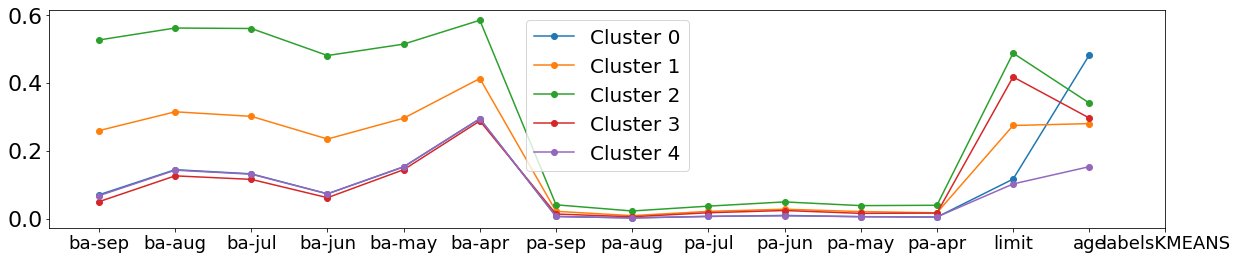

In [31]:
plt.figure(figsize=(20, 4))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df_work.columns)), df_work.columns, fontsize=18)
plt.legend(fontsize=20)
plt.show()

In [32]:
#for i in range(df_work['age'].size): 
#    if df_work.iloc[i]['labels']==0:
#        df_new=df_work.loc[i,'labels']
#df_new
    

SSE and Clustering Validation

In [33]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X.transpose(), kmeans.labels_))

SSE 452.94447065730986
Silhouette 0.32895593278255336


Knee Method to estimate the best K

In [34]:
sse_list = list()
max_k = 13
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

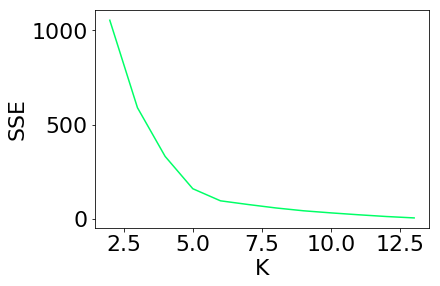

In [35]:
plt.plot(range(2, len(sse_list) + 2), sse_list, color='#00FF66')
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [36]:
sklearn.metrics.silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=None, random_state=None)

0.029411971147745648

In [37]:
#scaler.inverse_transform(scaler.transform(df_work.values))
silh_list = list()
max_k = 13
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    silh = sklearn.metrics.silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=None, random_state=None)
    silh_list.append(silh)

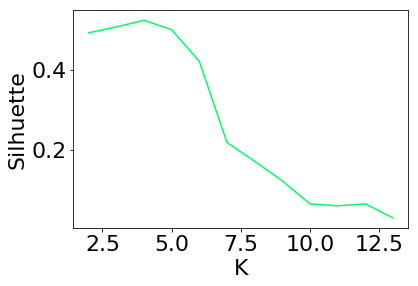

In [38]:
plt.plot(range(2, len(silh_list) + 2), silh_list, color='#00FF66')
plt.ylabel('Silhuette', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [39]:
len(kmeans.labels_)

14

In [40]:
df_work.head()

,ba-sep,ba-aug,ba-jul,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,limit,age,labelsKMEANS
0,48966,49985,50760,49535,30358,30302,2130,1905,1811,1100,1100,1200,50000,25,4
1,10755,9981,7843,6335,4616,7956,10120,7852,6336,4622,7956,5499,200000,54,0
2,30057,29280,30206,30496,29731,29047,0,1700,1100,3,1053,1303,30000,48,0
3,56426,41717,42823,25224,26855,23783,2000,2000,900,2000,10000,5000,140000,20,4
4,47987,48716,47632,48738,49601,52773,1788,0,1894,1801,3997,0,60000,36,4


# DBSCAN

## The Algorithm in a Nutshell

* A point is a **core** if it has more than minPts points within eps
* A point is a **border** if it has less than minPts points within eps but one of its neighboors is a core point
* A **noise** point is neither a core or a border point


1. Label all points as core, border or noise points
1. Eliminate noise points.
1. Put an edge between all core points that are within eps of each other
1. Make each group of connected core points into a separate cluster.
1. Assign each border point to one of the clusters of its associated core points.

> Ester, M., Kriegel, H. P., Sander, J., & Xu, X. (1996, August). A density-based algorithm for discovering clusters in large spatial databases with noise. In Kdd (Vol. 96, No. 34, pp. 226-231).

Running [example](http://matlaspisa.isti.cnr.it:5055/Dbscan)  
Wikipedia [link](https://en.wikipedia.org/wiki/DBSCAN)

## DBSCAN Problems

* Parameter tuning
* Does not recognize different densities

## DBSCAN in Python ([sklearn](http://scikit-learn.org/stable/modules/clustering.html#dbscan))

In [41]:
from sklearn.cluster import DBSCAN

In [42]:
X = scaler.fit_transform(df_work.values)

F:\Programs\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Parameters:
* **eps**: The maximum distance between two samples for them to be considered as in the same neighborhood.
* **min_samples**: The number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself.

In [43]:
dbscan = DBSCAN(eps=0.3, min_samples=3)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=1, p=None)

Output:
* **labels_**: Cluster labels for each point in the dataset. Noisy samples are given the label -1.

Labels

In [44]:
dbscan.labels_[:7]

array([0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [45]:
len(dbscan.labels_)

10000

In [46]:
X[:5]

array([[1.00839480e-01, 1.77236133e-01, 1.70378543e-01, 1.15166914e-01,
        1.67103281e-01, 3.07774702e-01, 4.31735170e-03, 1.55246349e-03,
        4.33681044e-03, 3.75475318e-03, 2.63164191e-03, 2.26986415e-03,
        5.19480519e-02, 9.09090909e-02, 1.00000000e+00],
       [4.00177637e-02, 1.18034097e-01, 1.05246304e-01, 4.77868294e-02,
        1.28590472e-01, 2.79040851e-01, 2.05124879e-02, 6.39892037e-03,
        1.51728498e-02, 1.57767902e-02, 1.90339482e-02, 1.04016525e-02,
        2.46753247e-01, 6.18181818e-01, 0.00000000e+00],
       [7.07413975e-02, 1.46594743e-01, 1.39185122e-01, 8.54713253e-02,
        1.66165221e-01, 3.06160946e-01, 0.00000000e+00, 1.38540049e-03,
        2.63417531e-03, 1.02402359e-05, 2.51919902e-03, 2.46469415e-03,
        2.59740260e-02, 5.09090909e-01, 0.00000000e+00],
       [1.12713810e-01, 1.65000296e-01, 1.58333093e-01, 7.72484594e-02,
        1.61862415e-01, 2.99392173e-01, 4.05385136e-03, 1.62988293e-03,
        2.15523435e-03, 6.82682396e-0

Observing the size of each cluster

In [47]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2], dtype=int64),
 array([ 103, 6014, 3880,    3], dtype=int64))

Visualization of the clustering in two dimensions.

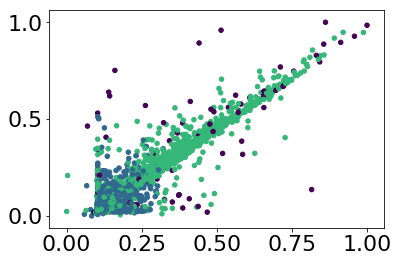

In [48]:
X=X.transpose()

plt.scatter(X[1], X[0], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [49]:
list(dbscan.labels_).count(-1)

103

In [50]:
df_work['labelsDBSCAN']=dbscan.labels_

In [51]:
df_work[:10]

,ba-sep,ba-aug,ba-jul,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,limit,age,labelsKMEANS,labelsDBSCAN
0,48966,49985,50760,49535,30358,30302,2130,1905,1811,1100,1100,1200,50000,25,4,0
1,10755,9981,7843,6335,4616,7956,10120,7852,6336,4622,7956,5499,200000,54,0,1
2,30057,29280,30206,30496,29731,29047,0,1700,1100,3,1053,1303,30000,48,0,1
3,56426,41717,42823,25224,26855,23783,2000,2000,900,2000,10000,5000,140000,20,4,0
4,47987,48716,47632,48738,49601,52773,1788,0,1894,1801,3997,0,60000,36,4,0
5,-6,1100,2527,1698,0,5062,1106,2527,1698,0,5062,0,260000,44,3,0
6,49624,48530,50255,49104,51044,50933,0,2800,0,3000,800,3000,50000,29,4,0
7,2880,3285,2280,248,248,-150,3285,0,248,0,0,0,30000,24,4,0
8,223,3035,4810,7546,9260,10000,3000,2000,3000,2000,1000,0,10000,24,4,0
9,181339,177233,188461,191363,188683,196057,0,14000,7000,0,10000,5000,200000,55,1,1


In [52]:
len(dbscan.labels_)

10000

In [53]:
X[:2]

array([[0.10083948, 0.04001776, 0.0707414 , ..., 0.06822646, 0.02758792,
        0.4361715 ],
       [0.17723613, 0.1180341 , 0.14659474, ..., 0.14576304, 0.10326319,
        0.48743562]])

In [54]:
X=X.transpose()

In [55]:
X[:2]

array([[0.10083948, 0.17723613, 0.17037854, 0.11516691, 0.16710328,
        0.3077747 , 0.00431735, 0.00155246, 0.00433681, 0.00375475,
        0.00263164, 0.00226986, 0.05194805, 0.09090909, 1.        ],
       [0.04001776, 0.1180341 , 0.1052463 , 0.04778683, 0.12859047,
        0.27904085, 0.02051249, 0.00639892, 0.01517285, 0.01577679,
        0.01903395, 0.01040165, 0.24675325, 0.61818182, 0.        ]])

Clustering Validation

In [56]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

Silhouette 0.5679632762422596


Knee Method to estimate the best eps

In [57]:
from scipy.spatial.distance import pdist, squareform

In [58]:
dist = pdist(X, 'euclidean')
dist = squareform(dist)

In [59]:
k = 4
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

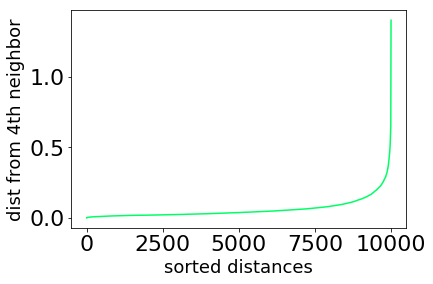

In [60]:
X=X.transpose()
plt.plot(range(0, len(kth_distances)), sorted(kth_distances), color='#00FF66')
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [61]:
df_work[['labelsKMEANS','labelsDBSCAN']].corr()

,labelsKMEANS,labelsDBSCAN
labelsKMEANS,1.000000,-0.896454
labelsDBSCAN,-0.896454,1.000000


# Hierarchical Clustering

In [73]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [115]:
X = scaler.fit_transform(df_work.values)

F:\Programs\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


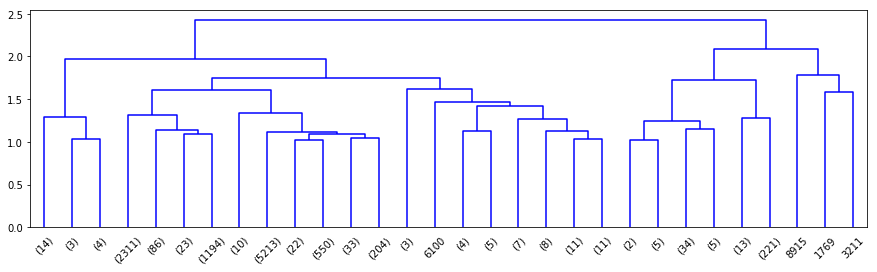

In [74]:
plt.figure(figsize=(15, 4))
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

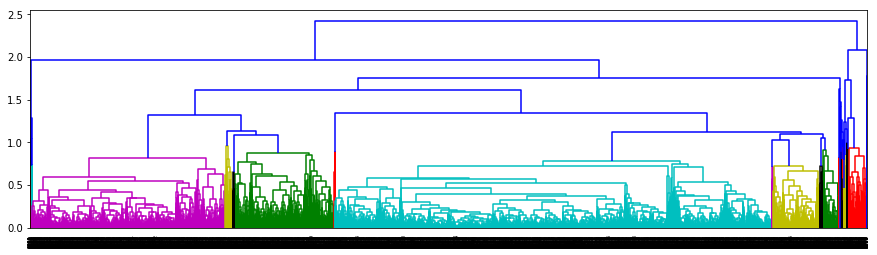

In [75]:
plt.figure(figsize=(15, 4))

res = dendrogram(data_link, color_threshold=1.0)

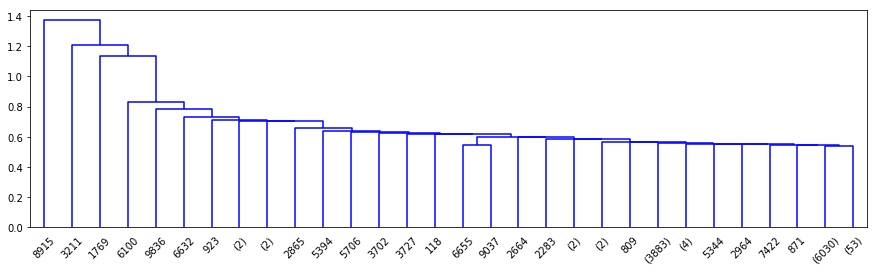

In [72]:
plt.figure(figsize=(15, 4))

data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')

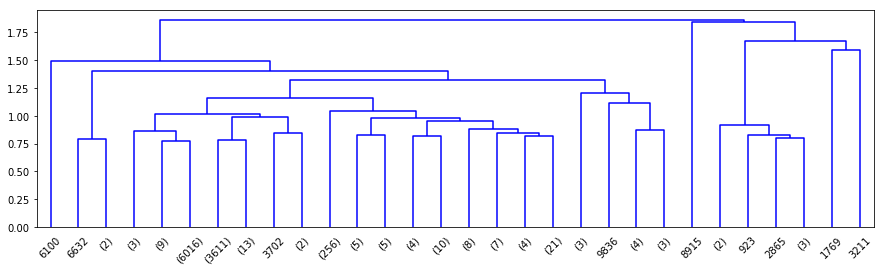

In [67]:
plt.figure(figsize=(15, 4))
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp')

In [76]:
from sklearn.cluster import AgglomerativeClustering

In [117]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

array([4, 2, 2, ..., 2, 2, 1], dtype=int64)

In [118]:
df_work['labelsHIER']=cluster.fit_predict(X)

In [79]:
df_work.head()

,ba-sep,ba-aug,ba-jul,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,limit,age,labelsKMEANS,labelsDBSCAN,labelsHIER
0,48966,49985,50760,49535,30358,30302,2130,1905,1811,1100,1100,1200,50000,25,4,0,4
1,10755,9981,7843,6335,4616,7956,10120,7852,6336,4622,7956,5499,200000,54,0,1,2
2,30057,29280,30206,30496,29731,29047,0,1700,1100,3,1053,1303,30000,48,0,1,2
3,56426,41717,42823,25224,26855,23783,2000,2000,900,2000,10000,5000,140000,20,4,0,4
4,47987,48716,47632,48738,49601,52773,1788,0,1894,1801,3997,0,60000,36,4,0,4


In [119]:
corr_matrix=df_work[['labelsKMEANS','labelsDBSCAN','labelsHIER']].corr()

In [120]:
import seaborn as sns

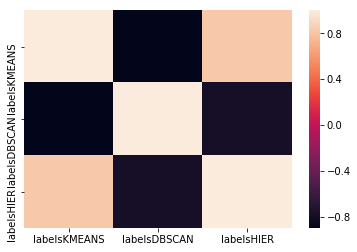

In [121]:
sns.heatmap(corr_matrix)

In [103]:
corr_matrix

,labelsKMEANS,labelsDBSCAN,labelsHIER
labelsKMEANS,1.000000,-0.896454,0.826743
labelsDBSCAN,-0.896454,1.000000,-0.781702
labelsHIER,0.826743,-0.781702,1.000000


In [85]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
ba-sep          10000 non-null int64
ba-aug          10000 non-null int64
ba-jul          10000 non-null int64
ba-jun          10000 non-null int64
ba-may          10000 non-null int64
ba-apr          10000 non-null int64
pa-sep          10000 non-null int64
pa-aug          10000 non-null int64
pa-jul          10000 non-null int64
pa-jun          10000 non-null int64
pa-may          10000 non-null int64
pa-apr          10000 non-null int64
limit           10000 non-null int64
age             10000 non-null int64
labelsKMEANS    10000 non-null int32
labelsDBSCAN    10000 non-null int64
labelsHIER      10000 non-null int64
dtypes: int32(1), int64(16)
memory usage: 1.3 MB


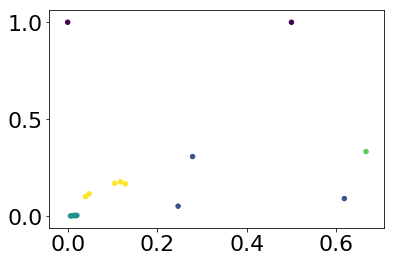

In [122]:
plt.scatter(X[1], X[0], c=cluster.fit_predict(X.transpose()), s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [106]:
print('Silhouette %s' % silhouette_score(X, cluster.labels_)

SyntaxError: unexpected EOF while parsing (<ipython-input-106-163c2bc5d857>, line 1)

ValueError: c of shape (17,) not acceptable as a color sequence for x with size 10000, y with size 10000

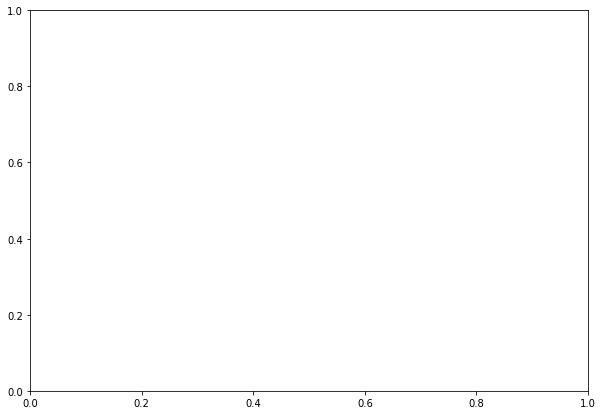

In [123]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_work.iloc[:,0], df_work.iloc[:,1], c=cluster.labels_, cmap='rainbow')